<img src="https://www.cct.ie/wp-content/themes/hdcct/img/atoms/logo.jpg" alt="CCT Logo" width="400" style="float: left; margin-right: 10px;">


<h1>Table of Contents<span class="tocSkip"><span></h1>


<h1 style="font-size: 20px;">1. Loading Libraries</h1> <a id="Loading Libraries"></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import altair as alt
import pandas as pd
import numpy as np
import panel as pn
import seaborn as sns

import plotly.express as px
from dash import dcc, html, Input, Output
from jupyter_dash import JupyterDash
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
import sklearn.preprocessing as preproc
from sklearn import preprocessing 
alt.data_transformers.enable("vegafusion")
import altair as alt
from sklearn import linear_model


import sklearn.feature_extraction.text as sk_text
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as sm
from datetime import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from spellchecker import SpellChecker
from statsmodels.tsa.seasonal import seasonal_decompose
import re
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from pprint import pprint
import pyLDAvis.gensim
import pyLDAvis
pyLDAvis.enable_notebook()
import pickle 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from textblob import TextBlob
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
import pyLDAvis
import pmdarima as pm
import sklearn.feature_extraction.text as sk_txt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report
from matplotlib.figure import Figure
from matplotlib import cm
from matplotlib.backends.backend_agg import FigureCanvas  
from mpl_toolkits.mplot3d import axes3d
import chardet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tulif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tulif\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("elon_musk_tweets.csv")
df.head()

id  user_name user_location           user_description  \
0  1544379368478212100  Elon Musk           NaN  Mars & Cars, Chips & Dips   
1  1544377493263720450  Elon Musk           NaN  Mars & Cars, Chips & Dips   
2  1544377130590552064  Elon Musk           NaN  Mars & Cars, Chips & Dips   
3  1544375575724400645  Elon Musk           NaN  Mars & Cars, Chips & Dips   
4  1544375148605853699  Elon Musk           NaN  Mars & Cars, Chips & Dips   

                user_created  user_followers  user_friends  user_favourites  \
0  2009-06-02 20:12:29+00:00       101240855           115            13503   
1  2009-06-02 20:12:29+00:00       101240806           115            13503   
2  2009-06-02 20:12:29+00:00       101240806           115            13503   
3  2009-06-02 20:12:29+00:00       101240806           115            13503   
4  2009-06-02 20:12:29+00:00       101240806           115            13503   

   user_verified                       date  \
0           True  2022-07-05 17:55:09+00:00   
1           True  2022-07-05 17:47:42+00:00   
2           True  2022-07-05 17:46:15+00:00   
3           True  2022-07-05 17:40:05+00:00   
4           True  2022-07-05 17:38:23+00:00   

                                                text hashtags  \
0  @BillyM2k I find the gold toe sock – inevitabl...      NaN   
1                 Sock Con, the conference for socks      NaN   
2  Always something new for the magazine cover an...      NaN   
3                   @ExplainThisBob This guy gets it      NaN   
4  Sock tech is so advanced that you can get pret...      NaN   

               source  retweets  favorites  is_retweet  
0  Twitter for iPhone       335       6542       False  
1  Twitter for iPhone      1451      30753       False  
2  Twitter for iPhone      1284      28610       False  
3  Twitter for iPhone       131       3640       False  
4  Twitter for iPhone      1191      23790       False

In [3]:
#
df.tail(5)

id  user_name user_location user_description  \
5899  1665143503108677634  Elon Musk           NaN              NaN   
5900  1665139144425631747  Elon Musk           NaN              NaN   
5901  1665137204782419968  Elon Musk           NaN              NaN   
5902  1665131126900285445  Elon Musk           NaN              NaN   
5903  1665121551652474880  Elon Musk           NaN              NaN   

                   user_created  user_followers  user_friends  \
5899  2009-06-02 20:12:29+00:00       143325985           330   
5900  2009-06-02 20:12:29+00:00       143325985           330   
5901  2009-06-02 20:12:29+00:00       143325985           330   
5902  2009-06-02 20:12:29+00:00       143325985           330   
5903  2009-06-02 20:12:29+00:00       143325985           330   

      user_favourites  user_verified                       date  \
5899            25655          False  2023-06-03 23:48:42+00:00   
5900            25655          False  2023-06-03 23:31:23+00:00   
5901            25655          False  2023-06-03 23:23:41+00:00   
5902            25655          False  2023-06-03 22:59:31+00:00   
5903            25655          False  2023-06-03 22:21:29+00:00   

                                                   text hashtags  \
5899                     @JonErlichman He’s not wrong …      NaN   
5900  @alifarhat79 Guys, I think I maybe took too mu...      NaN   
5901                                      @sriramk Cool      NaN   
5902               @cb_doge Time to complete the circle      NaN   
5903         @Jason Late stage civilization complacency      NaN   

                  source  retweets  favorites  is_retweet  
5899  Twitter for iPhone       361       4791       False  
5900  Twitter for iPhone      1609      61964       False  
5901  Twitter for iPhone        46        879       False  
5902  Twitter for iPhone       898      12467       False  
5903  Twitter for iPhone      1997      38113       False

<h1 style="font-size: 20px;">2. Data Exploration</h1> <a id="Data Exploration"></a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5904 entries, 0 to 5903
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5904 non-null   int64 
 1   user_name         5904 non-null   object
 2   user_location     1050 non-null   object
 3   user_description  1422 non-null   object
 4   user_created      5904 non-null   object
 5   user_followers    5904 non-null   int64 
 6   user_friends      5904 non-null   int64 
 7   user_favourites   5904 non-null   int64 
 8   user_verified     5904 non-null   bool  
 9   date              5904 non-null   object
 10  text              5904 non-null   object
 11  hashtags          2 non-null      object
 12  source            5904 non-null   object
 13  retweets          5904 non-null   int64 
 14  favorites         5904 non-null   int64 
 15  is_retweet        5904 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 657.4+ KB


In [5]:
# of non null value
df.count

<bound method DataFrame.count of                        id  user_name user_location           user_description  \
0     1544379368478212100  Elon Musk           NaN  Mars & Cars, Chips & Dips   
1     1544377493263720450  Elon Musk           NaN  Mars & Cars, Chips & Dips   
2     1544377130590552064  Elon Musk           NaN  Mars & Cars, Chips & Dips   
3     1544375575724400645  Elon Musk           NaN  Mars & Cars, Chips & Dips   
4     1544375148605853699  Elon Musk           NaN  Mars & Cars, Chips & Dips   
...                   ...        ...           ...                        ...   
5899  1665143503108677634  Elon Musk           NaN                        NaN   
5900  1665139144425631747  Elon Musk           NaN                        NaN   
5901  1665137204782419968  Elon Musk           NaN                        NaN   
5902  1665131126900285445  Elon Musk           NaN                        NaN   
5903  1665121551652474880  Elon Musk           NaN                        Na

In [6]:
#total count of non null value in dataset
df.count().sum()

79226

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

id                     0
user_name              0
user_location       4854
user_description    4482
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            5902
source                 0
retweets               0
favorites              0
is_retweet             0
dtype: int64


In [8]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, user_name, user_location, user_description, user_created, user_followers, user_friends, user_favourites, user_verified, date, text, hashtags, source, retweets, favorites, is_retweet]
Index: []


<h1 style="font-size: 20px;">3. Text Cleaning and Preprocessing</h1> <a id="Text Cleaning and Preprocessing"></a>

In [9]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    words = word_tokenize(text)
    words = [ps.stem(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [10]:
# Getting our texts in a list to process
texts = df['text'].values.tolist()

In [11]:
def sent_to_words(texts):
    return [word_tokenize(text) for text in texts]


In [12]:
def remove_stopwords(words):
    return [word_tokenize(text) for text in texts]

In [13]:
words = ['word1', 'word2', 'word3', ...]

len(words)

4

In [14]:
words[0]

'word1'

<h1 style="font-size: 20px;">4. EDA For Data Distribution</h1> <a id="EDA For Data Distribution"></a>

In [15]:
df['text_lenth'] = df['cleaned_text'].apply(len)
print(df['text_lenth'].describe())

count    5904.000000
mean       40.949018
std        23.314311
min         0.000000
25%        22.000000
50%        35.000000
75%        60.000000
max       129.000000
Name: text_lenth, dtype: float64


<h1 style="font-size: 20px;">5. Feature Extraction</h1> <a id="Feature Extraction"></a>


In [16]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['text'])

In [17]:
#text analysis
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [18]:
# Make a dictionary of ids for the words
example_text = "This is an example sentence."

# Tokenize the text
tokens = word_tokenize(example_text.lower()) 

words = [tokens]

# Now create the dictionary
id2word = corpora.Dictionary(words)


In [19]:
id2word

In [20]:
# Translates our words into their correspoinding ids
corpus = [id2word.doc2bow(text) for text in words]

In [21]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]]

In [22]:
num_topics = 20

<h1 style="font-size: 20px;">6. LDA model</h1> <a id="LDA model"></a>

In [23]:
# Making our LDA model object
lda_model = gensim.models.LdaMulticore(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics
)

In [24]:
pprint(lda_model.print_topics())

[(0,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (1,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (2,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (3,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (4,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (5,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (6,
  '0.167*"an" + 0.167*"is" + 0.167*"this" + 0.167*"sentence" + 0.167*"." + '
  '0.167*"example"'),
 (7,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (8,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 0.167*"sentence" + '
  '0.167*"this"'),
 (9,
  '0.167*"." + 0.167*"an" + 0.167*"example" + 0.167*"is" + 

In [25]:
# Preparing our results for visualisation
LDAvis_prepared = pyLDAvis.gensim.prepare(
    lda_model, 
    corpus, 
    id2word
)

In [26]:
# Optional, saves our visualisation prep
with open("LDA_vis_prep", 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

In [27]:
#identify complex numbers
print(LDAvis_prepared)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.0+0.0j  0.0+0.0j       1        1  86.428555
0      0.0+0.0j -0.0+0.0j       2        1   0.714287
11     0.0+0.0j -0.0+0.0j       3        1   0.714287
18     0.0+0.0j -0.0+0.0j       4        1   0.714287
17     0.0+0.0j  0.0+0.0j       5        1   0.714287
16     0.0+0.0j  0.0+0.0j       6        1   0.714287
15     0.0+0.0j  0.0+0.0j       7        1   0.714287
14     0.0+0.0j  0.0+0.0j       8        1   0.714287
13     0.0+0.0j  0.0+0.0j       9        1   0.714287
12     0.0+0.0j  0.0+0.0j      10        1   0.714287
10     0.0+0.0j  0.0+0.0j      11        1   0.714287
1      0.0+0.0j  0.0+0.0j      12        1   0.714287
9      0.0+0.0j  0.0+0.0j      13        1   0.714287
8      0.0+0.0j  0.0+0.0j      14        1   0.714287
7      0.0+0.0j  0.0+0.0j      15        1   0.714287
5      0.0+0.0j  0.0+0.0j      16        1   0.7142

<h1 style="font-size: 20px;">7. LDAvis_Prepared</h1> <a id="LDAvis_Prepared"></a>

In [28]:
#adding more stopword

stop_words.update(['is','sample','this','another','example'])


In [29]:
# Remove punctuation
df['processsed_text'] = df['text'].map(lambda x: re.sub('[,\\.!?]', '', x))
# Convert the titles to lowercase
df['processsed_text'] = df['processsed_text'].map(lambda x: x.lower())

C:\Users\tulif\AppData\Roaming\Python\Python310\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


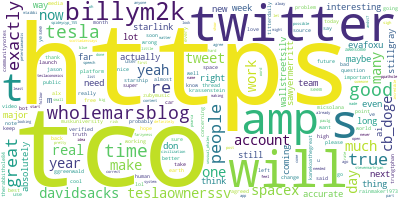

In [30]:
texts = df['processsed_text'].values.tolist()
words = list(sent_to_words(texts))
words = remove_stopwords(words) 

long_list = []
for text in words:
    long_list.extend(text)
long_list

long_string = ','.join(long_list)

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', collocations=False)

wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [31]:
id2word = corpora.Dictionary(words)
corpus = [id2word.doc2bow(text) for text in words]
num_topics = 20
lda_model = gensim.models.LdaMulticore(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics
)
LDAvis_prepared = pyLDAvis.gensim.prepare(
    lda_model, 
    corpus, 
    id2word
)
with open("LDA_vis_prep_2", 'wb') as f:
    pickle.dump(LDAvis_prepared, f)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
3      0.035365 -0.004827       1        1  7.924274
10     0.049531  0.020776       2        1  7.139817
8      0.038533  0.021066       3        1  6.751448
11     0.038245  0.036743       4        1  6.733609
0      0.036833  0.020460       5        1  6.707368
7      0.036689 -0.050041       6        1  6.494053
6      0.034141 -0.004907       7        1  6.054166
19     0.017094 -0.010666       8        1  6.047410
14     0.018852 -0.073866       9        1  5.920087
18     0.035944  0.064513      10        1  5.877708
13     0.032075  0.037552      11        1  5.848742
2      0.005343 -0.055660      12        1  5.649965
17     0.015482  0.037233      13        1  5.233234
9      0.041764 -0.043751      14        1  4.949586
12    -0.013261 -0.046612      15        1  3.926613
15    -0.052783  0.046935      16        1  2.203970
16    -0.074308  0.018008      17        1  1.886875
4     -0.069100  0.000969      18        1  1.747985
1     -0.097805 -0.024412      19        1  1.627189
5     -0.128633  0.010488      20        1  1.275901, topic_info=        Term         Freq        Total Category  logprob  loglift
2          @  6459.000000  6459.000000  Default  30.0000  30.0000
50        is  1099.000000  1099.000000  Default  29.0000  29.0000
19       the  1356.000000  1356.000000  Default  28.0000  28.0000
12         i   579.000000   579.000000  Default  27.0000  27.0000
49        in   514.000000   514.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
19       the     4.710064  1356.012907  Topic20  -5.2716  -1.3011
126     have     3.383962   188.866869  Topic20  -5.6022   0.3395
55      that     3.460093   536.920988  Topic20  -5.5800  -0.6830
132  twitter     3.218006   287.970648  Topic20  -5.6525  -0.1326
26       for     2.937879   483.389397  Topic20  -5.7436  -0.7416

[1519 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.086501    &
0         2  0.110721    &
0         3  0.013840    &
0         4  0.096881    &
0         5  0.100341    &
...     ...       ...  ...
1563     15  0.122050    🎶
1993      8  0.730189    💯
2376      2  0.793794    😎
5868      2  0.581901    🥰
9310     16  0.434161    🧀

[4027 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 11, 9, 12, 1, 8, 7, 20, 15, 19, 14, 3, 18, 10, 13, 16, 17, 5, 2, 6])

#convert to Lower case 
df["user_name"] = pd.Series(df["user_name"]).astype(str).str.lower()

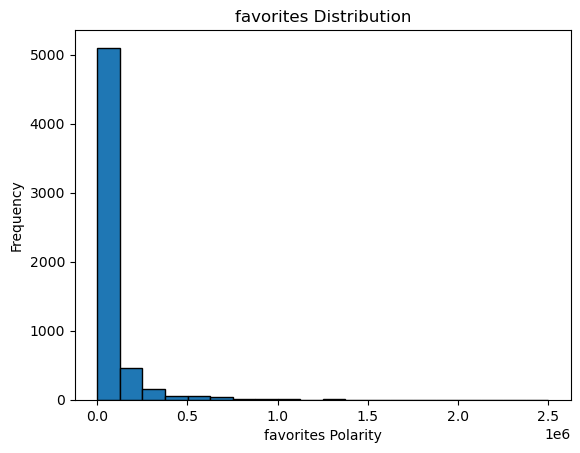

In [32]:
#favorites tweets distribution
plt.hist(df['favorites'], bins=20, edgecolor='black')
plt.title('favorites Distribution')
plt.xlabel('favorites Polarity')
plt.ylabel('Frequency')
plt.show()

In [33]:
len(words)

5904

In [34]:
words[0]

['@',
 'billym2k',
 'i',
 'find',
 'the',
 'gold',
 'toe',
 'sock',
 '–',
 'inevitably',
 'off',
 'kilter',
 '&',
 'amp',
 ';',
 'washed',
 'out',
 '–',
 'a',
 'little',
 'troubling',
 'esthetically',
 '&',
 'amp',
 ';',
 'arguably',
 'a',
 'bit',
 'corpo']

In [35]:
df.head()

id  user_name user_location           user_description  \
0  1544379368478212100  Elon Musk           NaN  Mars & Cars, Chips & Dips   
1  1544377493263720450  Elon Musk           NaN  Mars & Cars, Chips & Dips   
2  1544377130590552064  Elon Musk           NaN  Mars & Cars, Chips & Dips   
3  1544375575724400645  Elon Musk           NaN  Mars & Cars, Chips & Dips   
4  1544375148605853699  Elon Musk           NaN  Mars & Cars, Chips & Dips   

                user_created  user_followers  user_friends  user_favourites  \
0  2009-06-02 20:12:29+00:00       101240855           115            13503   
1  2009-06-02 20:12:29+00:00       101240806           115            13503   
2  2009-06-02 20:12:29+00:00       101240806           115            13503   
3  2009-06-02 20:12:29+00:00       101240806           115            13503   
4  2009-06-02 20:12:29+00:00       101240806           115            13503   

   user_verified                       date  \
0           True  2022-07-05 17:55:09+00:00   
1           True  2022-07-05 17:47:42+00:00   
2           True  2022-07-05 17:46:15+00:00   
3           True  2022-07-05 17:40:05+00:00   
4           True  2022-07-05 17:38:23+00:00   

                                                text hashtags  \
0  @BillyM2k I find the gold toe sock – inevitabl...      NaN   
1                 Sock Con, the conference for socks      NaN   
2  Always something new for the magazine cover an...      NaN   
3                   @ExplainThisBob This guy gets it      NaN   
4  Sock tech is so advanced that you can get pret...      NaN   

               source  retweets  favorites  is_retweet  \
0  Twitter for iPhone       335       6542       False   
1  Twitter for iPhone      1451      30753       False   
2  Twitter for iPhone      1284      28610       False   
3  Twitter for iPhone       131       3640       False   
4  Twitter for iPhone      1191      23790       False   

                                        cleaned_text  text_lenth  sentiment  \
0  i find gold toe sock inevit kilter amp wash li...          85  -0.093750   
1                               sock con confer sock          20   0.000000   
2  alway someth new magazin cover articl practic ...          51   0.136364   
3                         explainthisbob thi guy get          26   0.000000   
4  sock tech advanc get pretti much anyth sock fo...          52   0.300000   

                                     processsed_text  
0  @billym2k i find the gold toe sock – inevitabl...  
1                  sock con the conference for socks  
2  always something new for the magazine cover an...  
3                   @explainthisbob this guy gets it  
4  sock tech is so advanced that you can get pret...

<h1 style="font-size: 20px;">8. Time Series Analysis</h1> <a id="Time Series Analysis"></a>

Discuss the concept and application of Time Series Analysis using Machine Learning Modeling by providing a real-world data set.

In [36]:
#fixing the  ParserError due to incorrect formating

# Detect the encoding of the file
with open('elon_musk_tweets.csv', 'rb') as file:
    result = chardet.detect(file.read())
    encoding = result['encoding']

# Try using 'utf-8' or 'latin-1' as alternative encodings
try_encodings = ['utf-8', 'latin-1']

for try_encoding in try_encodings:
    try:
        # Read the file in binary mode and decode manually
        with open('elon_musk_tweets.csv', 'rb') as file:
            content = file.read().decode(try_encoding)

      
        print(f"Successfully decoded using encoding: {try_encoding}")
        print(content[:500])  
        break  #
    except UnicodeDecodeError:
        print(f"Failed to decode using encoding: {try_encoding}")



Successfully decoded using encoding: utf-8
id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
1544379368478212100,Elon Musk,,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240855,115,13503,True,2022-07-05 17:55:09+00:00,@BillyM2k I find the gold toe sock – inevitably off kilter &amp; washed out – a little troubling esthetically &amp; arguably a bit corpo,,Twitter for iPhone,335,6542,False
1544377493263720450,E


Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')


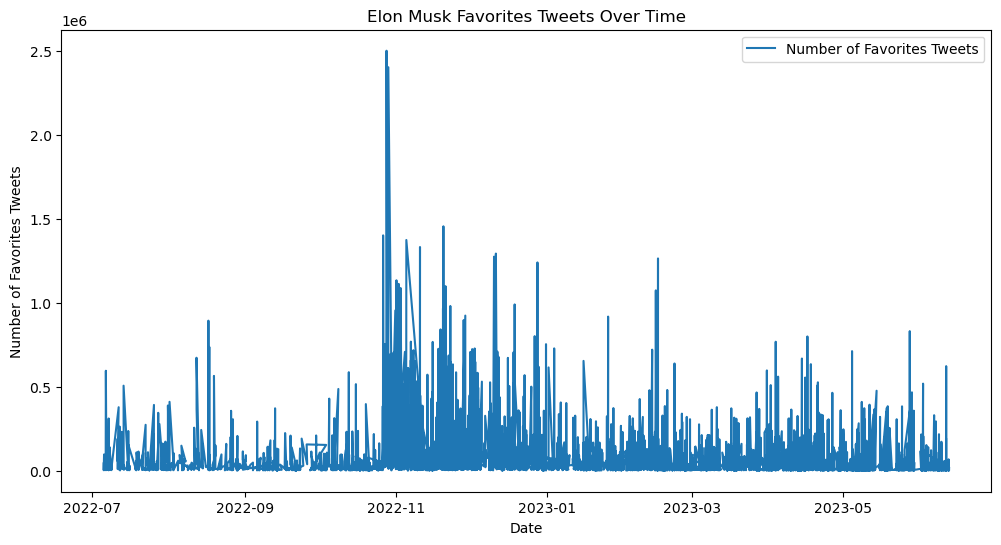

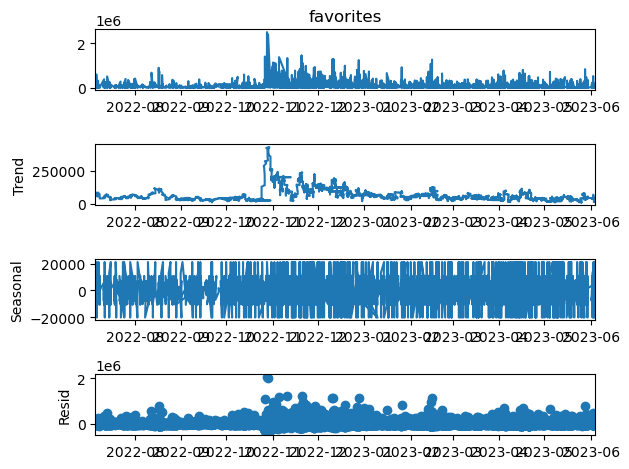

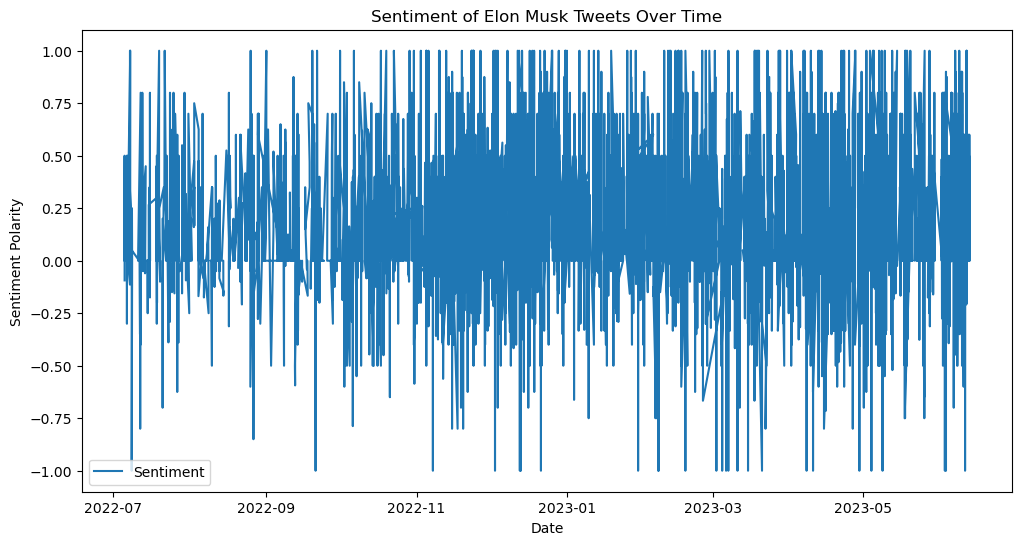

In [37]:
#Time Series
# Read the dataset from Kaggle
url = "https://www.kaggle.com/code/vencerlanz09/elon-musk-tweets-eda-and-sentiment-analysis/notebook#%E2%9C%92%EF%B8%8FInitialization"

df = pd.read_csv('elon_musk_tweets.csv', encoding='utf-8', delimiter=',')

print(df.columns)


if 'date' in df.columns:
    # Convert 'date' column to datetime format
    df['date'] = pd.to_datetime(df['date'])

    # Set 'date' as the index
    df.set_index('date', inplace=True)

   
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['favorites'], label='Number of Favorites Tweets')
    plt.title('Elon Musk Favorites Tweets Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Favorites Tweets')
    plt.legend()
    plt.show()

    # Decompose the time series into trend, seasonal, and residual components
    result = seasonal_decompose(df['favorites'], model='additive', period=30)  
    result.plot()
    plt.show()

    # Sentiment analysis of the tweets
    df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

    # Visualize sentiment over time
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['sentiment'], label='Sentiment')
    plt.title('Sentiment of Elon Musk Tweets Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Polarity')
    plt.legend()
    plt.show()

else:
    print("Error: 'date' column not found in the dataset.")


In [38]:
print(df.columns)

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'text', 'hashtags', 'source', 'retweets', 'favorites', 'is_retweet',
       'sentiment'],
      dtype='object')


In [39]:
# Reset the index to make 'date' a regular column (Error: 'date' column not found in the dataset.)
df.reset_index(inplace=True)

In [40]:
#Convert to datetime
df["date"] = pd.to_datetime(df["date"])

In [41]:
df = df.groupby([df["date"].dt.date, "user_name"])[["retweets", "favorites"]].mean().astype(int)
df.head()

retweets  favorites
date       user_name                     
2022-07-05 Elon Musk      1476      30261
2022-07-06 Elon Musk      6888      90640
2022-07-07 Elon Musk      5213      75226
2022-07-08 Elon Musk      1718      20089
2022-07-11 Elon Musk      5284      81158

In [42]:
#add index
df = df.reset_index()
df.head()

date  user_name  retweets  favorites
0  2022-07-05  Elon Musk      1476      30261
1  2022-07-06  Elon Musk      6888      90640
2  2022-07-07  Elon Musk      5213      75226
3  2022-07-08  Elon Musk      1718      20089
4  2022-07-11  Elon Musk      5284      81158

<Axes: xlabel='date'>

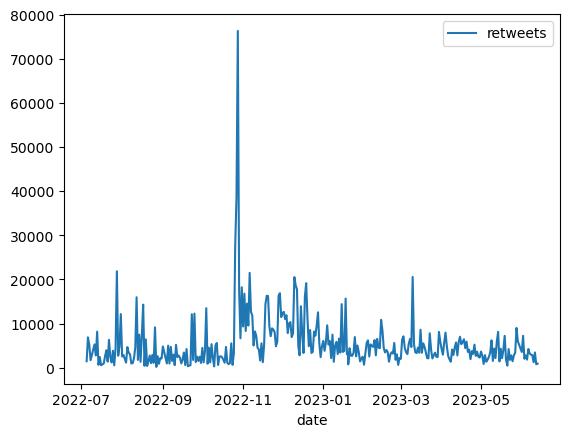

In [43]:
df.plot(x="date", y="retweets")

<h1 style="font-size: 20px;">9. The Augmented Dickey-Fuller Test</h1> <a id="The Augmented Dickey-Fuller Test"></a>

What is the purpose of The Augmented Dickey-Fuller Test in time series?

In [44]:
df = pd.read_csv("elon_musk_tweets.csv", parse_dates=['date'])

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

result = adfuller(df['date'].values)

# Extract and print the test statistic and p-value
test_statistic, p_value, _, _, _, _ = result
print(f'Test Statistic: {test_statistic}')
print(f'P-value: {p_value}')

if p_value <= 0.05:
    print("Reject the null hypothesis: The time series is stationary.")
else:
    print("Fail to reject the null hypothesis: The time series is non-stationary.")



Test Statistic: 13.066177877626313
P-value: 1.0
Fail to reject the null hypothesis: The time series is non-stationary.


In [45]:
adfuller(df["favorites"])

(-7.405366759734033,
 7.368981302595311e-11,
 32,
 5871,
 {'1%': -3.431464318079141,
  '5%': -2.862032424175353,
  '10%': -2.567032115219454},
 154732.6966844014)

In [46]:
df.shape

(5904, 16)

In [47]:
split = int(df.shape[0] * 0.8)

In [48]:
split

4723

In [49]:
df_train = df[:split]
df_test = df[split:]

In [50]:
df_train.shape

(4723, 16)

In [51]:
df_train.tail()

id  user_name user_location user_description  \
4718  1650731557164818437  Elon Musk     Trøllheim          nothing   
4719  1650730171836559360  Elon Musk     Trøllheim          nothing   
4720  1650729691043573761  Elon Musk     Trøllheim          nothing   
4721  1650727921609322496  Elon Musk     Trøllheim          nothing   
4722  1650717222141153280  Elon Musk     Trøllheim          nothing   

                   user_created  user_followers  user_friends  \
4718  2009-06-02 20:12:29+00:00       138012717           266   
4719  2009-06-02 20:12:29+00:00       138012717           266   
4720  2009-06-02 20:12:29+00:00       138012717           266   
4721  2009-06-02 20:12:29+00:00       138012717           266   
4722  2009-06-02 20:12:29+00:00       138012717           266   

      user_favourites  user_verified                      date  \
4718            22452          False 2023-04-25 05:20:46+00:00   
4719            22452          False 2023-04-25 05:15:16+00:00   
4720            22452          False 2023-04-25 05:13:22+00:00   
4721            22452          False 2023-04-25 05:06:20+00:00   
4722            22452          False 2023-04-25 04:23:49+00:00   

                                                   text hashtags  \
4718              Verified accounts are now prioritized      NaN   
4719               @johnhackerla That meme rings a bell      NaN   
4720  Sometimes, when you learn about something, you...      NaN   
4721  @farzyness It’s been a while since had to inte...      NaN   
4722  @Not_the_Bee I agree with assisted suicide if ...      NaN   

                  source  retweets  favorites  is_retweet  
4718  Twitter for iPhone     20285     306265       False  
4719  Twitter for iPhone       489       7800       False  
4720  Twitter for iPhone     11207     112864       False  
4721  Twitter for iPhone       321       4551       False  
4722  Twitter for iPhone      2216      37653       False

In [52]:
adfuller(df_train["favorites"])

(-7.908687565773407,
 4.001992212396679e-12,
 25,
 4697,
 {'1%': -3.4317429907112977,
  '5%': -2.862155542525302,
  '10%': -2.5670976555335967},
 124358.34014311232)

In [53]:
adfuller(df_train["favorites"].diff(1).dropna())

(-19.949774595576642,
 0.0,
 31,
 4690,
 {'1%': -3.4317450709415156,
  '5%': -2.8621564615335138,
  '10%': -2.567098144762026},
 124379.25702028045)

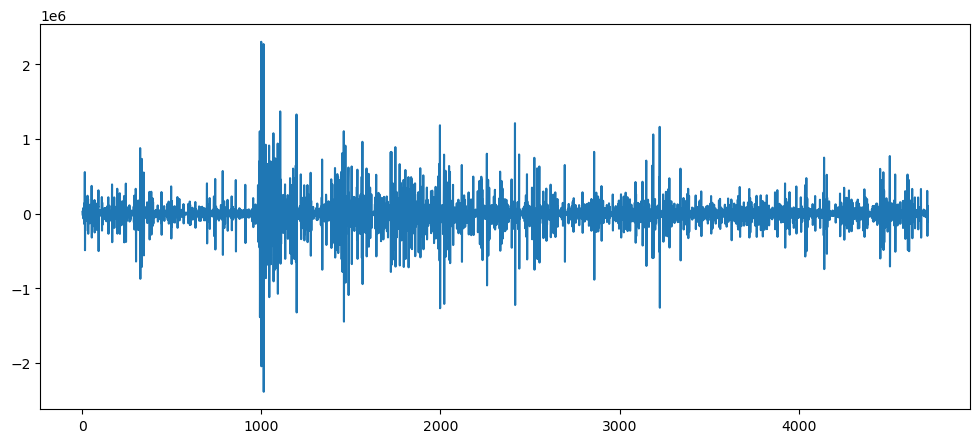

In [54]:
plt.figure(figsize= [12, 5])
plt.plot(df_train["favorites"].diff(1).dropna());

In [55]:
adfuller(df_train["date"])

(13.32400204934439,
 1.0,
 12,
 4710,
 {'1%': -3.4317391438401716,
  '5%': -2.862153843045292,
  '10%': -2.567096750826042},
 311333.3045140515)

In [56]:
adfuller(df_train["date"].diff(1).dropna())

(-26.54420900299233,
 0.0,
 11,
 4710,
 {'1%': -3.4317391438401716,
  '5%': -2.862153843045292,
  '10%': -2.567096750826042},
 311267.13901963306)

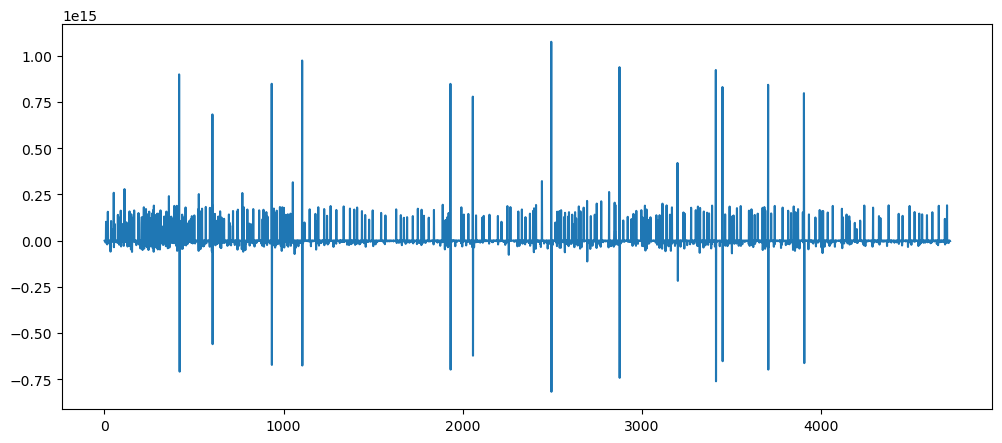

In [57]:
plt.figure(figsize= [12, 5])
plt.plot(df_train["date"].diff(1).dropna());

In [58]:
df["Diff"] = df_train["favorites"].diff(1)

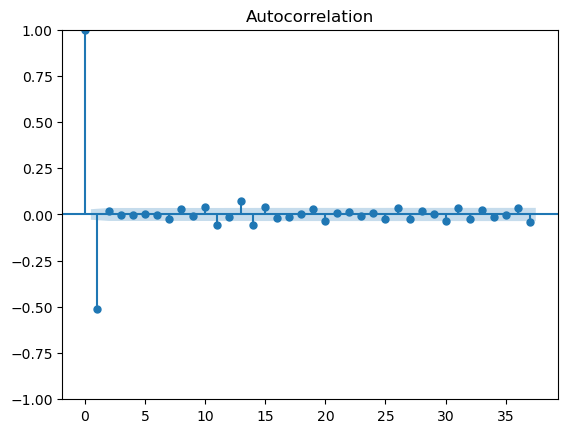

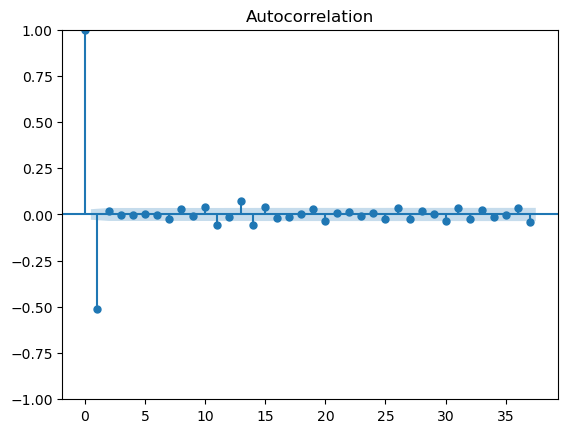

In [59]:
plot_acf(df["Diff"].dropna())

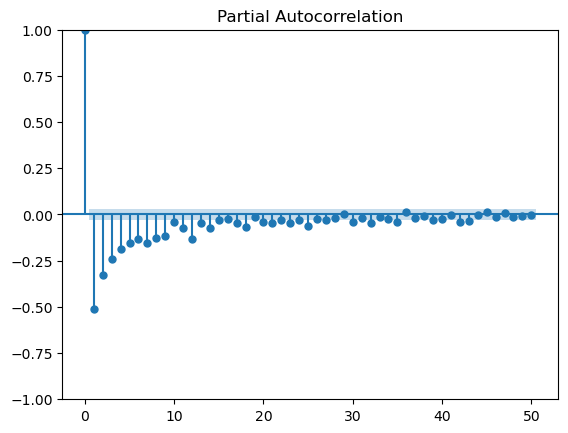

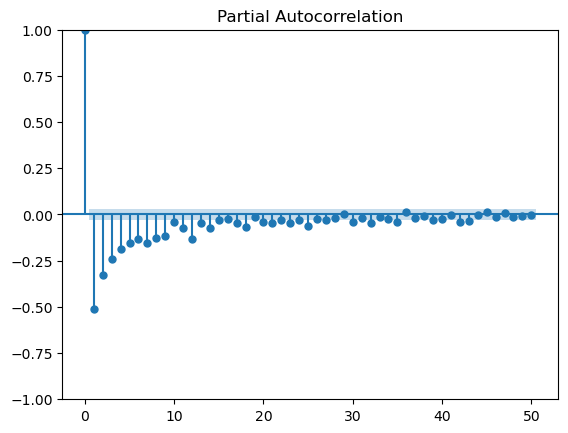

In [60]:
plot_pacf(df["Diff"].dropna(), method="ywm", lags=50)

In [62]:
#Arima Model
aicVals = []
for p in range(5):
    for d in range(5):
        for q in range(5):
            print(f"p: {p}, d: {d}, q: {q}")
            
            try:
                
                model = pm.auto_arima(df["favorites"], suppress_warnings=True, seasonal=False, stepwise=True, order=(p, d, q))
                aicVals.append([model.aic(), p, d, q])
            except Exception as e:
                print(f"Error for p={p}, d={d}, q={q}: {e}")




p: 0, d: 0, q: 0
p: 0, d: 0, q: 1
p: 0, d: 0, q: 2
p: 0, d: 0, q: 3
p: 0, d: 0, q: 4
p: 0, d: 1, q: 0
p: 0, d: 1, q: 1
p: 0, d: 1, q: 2
p: 0, d: 1, q: 3
p: 0, d: 1, q: 4
p: 0, d: 2, q: 0
p: 0, d: 2, q: 1
p: 0, d: 2, q: 2
p: 0, d: 2, q: 3
p: 0, d: 2, q: 4
p: 0, d: 3, q: 0
p: 0, d: 3, q: 1
p: 0, d: 3, q: 2
p: 0, d: 3, q: 3
p: 0, d: 3, q: 4
p: 0, d: 4, q: 0
p: 0, d: 4, q: 1
p: 0, d: 4, q: 2
p: 0, d: 4, q: 3
p: 0, d: 4, q: 4
p: 1, d: 0, q: 0
p: 1, d: 0, q: 1
p: 1, d: 0, q: 2
p: 1, d: 0, q: 3
p: 1, d: 0, q: 4
p: 1, d: 1, q: 0
p: 1, d: 1, q: 1
p: 1, d: 1, q: 2
p: 1, d: 1, q: 3
p: 1, d: 1, q: 4
p: 1, d: 2, q: 0
p: 1, d: 2, q: 1
p: 1, d: 2, q: 2
p: 1, d: 2, q: 3
p: 1, d: 2, q: 4
p: 1, d: 3, q: 0
p: 1, d: 3, q: 1
p: 1, d: 3, q: 2
p: 1, d: 3, q: 3
p: 1, d: 3, q: 4
p: 1, d: 4, q: 0
p: 1, d: 4, q: 1
p: 1, d: 4, q: 2
p: 1, d: 4, q: 3
p: 1, d: 4, q: 4
p: 2, d: 0, q: 0
p: 2, d: 0, q: 1
p: 2, d: 0, q: 2
p: 2, d: 0, q: 3
p: 2, d: 0, q: 4
p: 2, d: 1, q: 0
p: 2, d: 1, q: 1
p: 2, d: 1, q: 2
p: 2, d: 1, q:

In [63]:
aicVals.sort()

In [64]:
aicVals

[[155659.01467257412, 0, 0, 0],
 [155659.01467257412, 0, 0, 1],
 [155659.01467257412, 0, 0, 2],
 [155659.01467257412, 0, 0, 3],
 [155659.01467257412, 0, 0, 4],
 [155659.01467257412, 0, 1, 0],
 [155659.01467257412, 0, 1, 1],
 [155659.01467257412, 0, 1, 2],
 [155659.01467257412, 0, 1, 3],
 [155659.01467257412, 0, 1, 4],
 [155659.01467257412, 0, 2, 0],
 [155659.01467257412, 0, 2, 1],
 [155659.01467257412, 0, 2, 2],
 [155659.01467257412, 0, 2, 3],
 [155659.01467257412, 0, 2, 4],
 [155659.01467257412, 0, 3, 0],
 [155659.01467257412, 0, 3, 1],
 [155659.01467257412, 0, 3, 2],
 [155659.01467257412, 0, 3, 3],
 [155659.01467257412, 0, 3, 4],
 [155659.01467257412, 0, 4, 0],
 [155659.01467257412, 0, 4, 1],
 [155659.01467257412, 0, 4, 2],
 [155659.01467257412, 0, 4, 3],
 [155659.01467257412, 0, 4, 4],
 [155659.01467257412, 1, 0, 0],
 [155659.01467257412, 1, 0, 1],
 [155659.01467257412, 1, 0, 2],
 [155659.01467257412, 1, 0, 3],
 [155659.01467257412, 1, 0, 4],
 [155659.01467257412, 1, 1, 0],
 [155659

In [65]:
model = SARIMAX(df_train["favorites"], order=(2, 1, 2), seasonal_order=(2, 1, 2,12)).fit()

In [66]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          favorites   No. Observations:                 4723
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood              -63069.341
Date:                            Fri, 24 Nov 2023   AIC                         126156.682
Time:                                    13:37:45   BIC                         126214.799
Sample:                                         0   HQIC                        126177.113
                                           - 4723                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7692      0.510     -1.510      0.131      -1.768       0.229
ar.L2          0.0098      0.027      0.361      0.718      -0.043       0.063
ma.L1         -0.1959      0.506     -0.387      0.699      -1.188       0.797
ma.L2         -0.7414      0.486     -1.527      0.127      -1.693       0.210
ar.S.L12      -0.8718      1.328     -0.657      0.511      -3.474       1.730
ar.S.L24      -0.0086      0.022     -0.384      0.701      -0.053       0.035
ma.S.L12      -0.1267      1.327     -0.096      0.924      -2.727       2.474
ma.S.L24      -0.8576      1.315     -0.652      0.514      -3.435       1.720
sigma2      4.297e+10   5.46e-11   7.87e+20      0.000     4.3e+10     4.3e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            410513.17
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                             4.90
Prob(H) (two-sided):                  0.00   Kurtosis:                        47.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.31e+38. Standard errors may be unstable.
"""

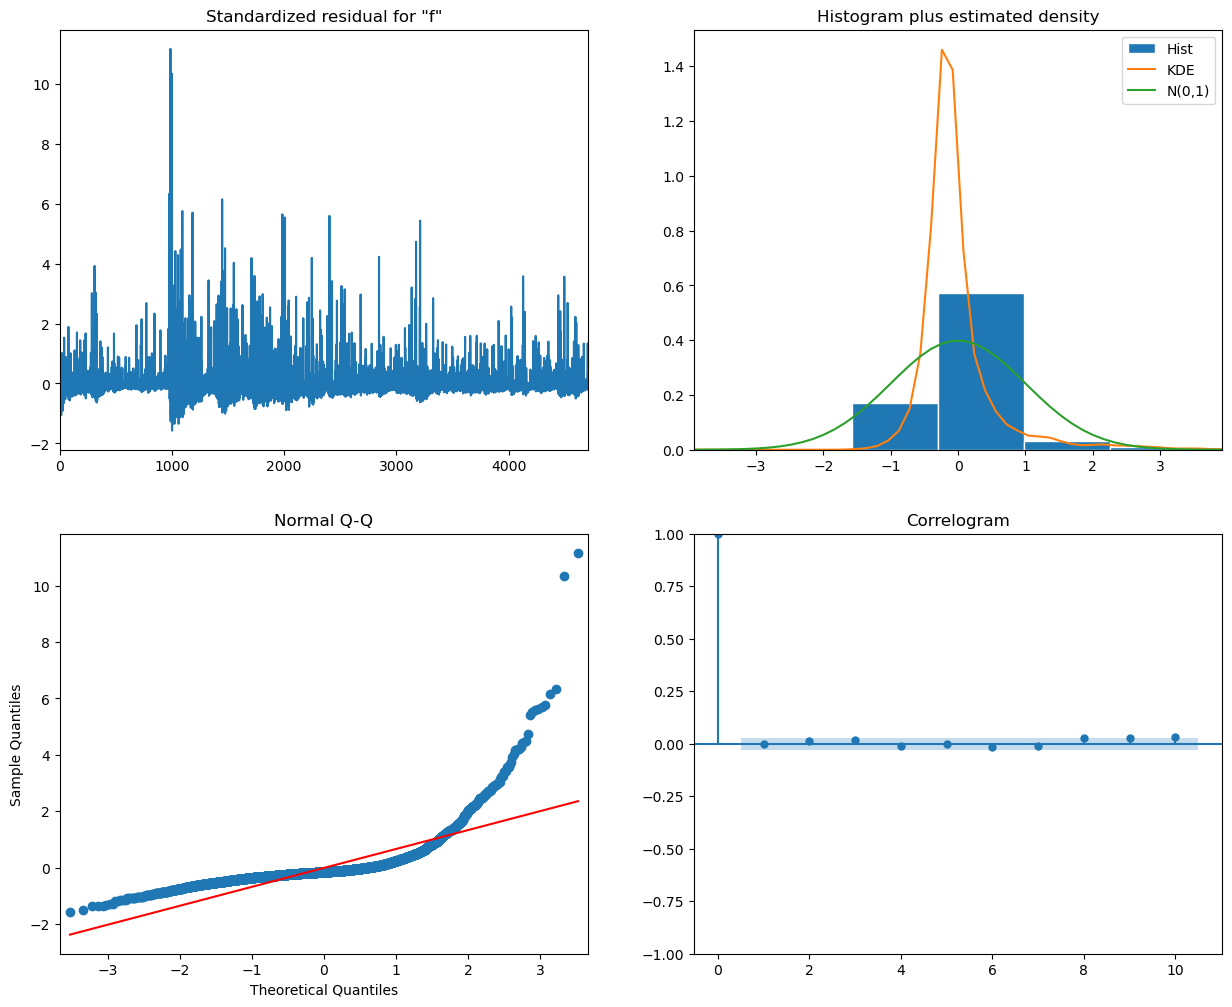

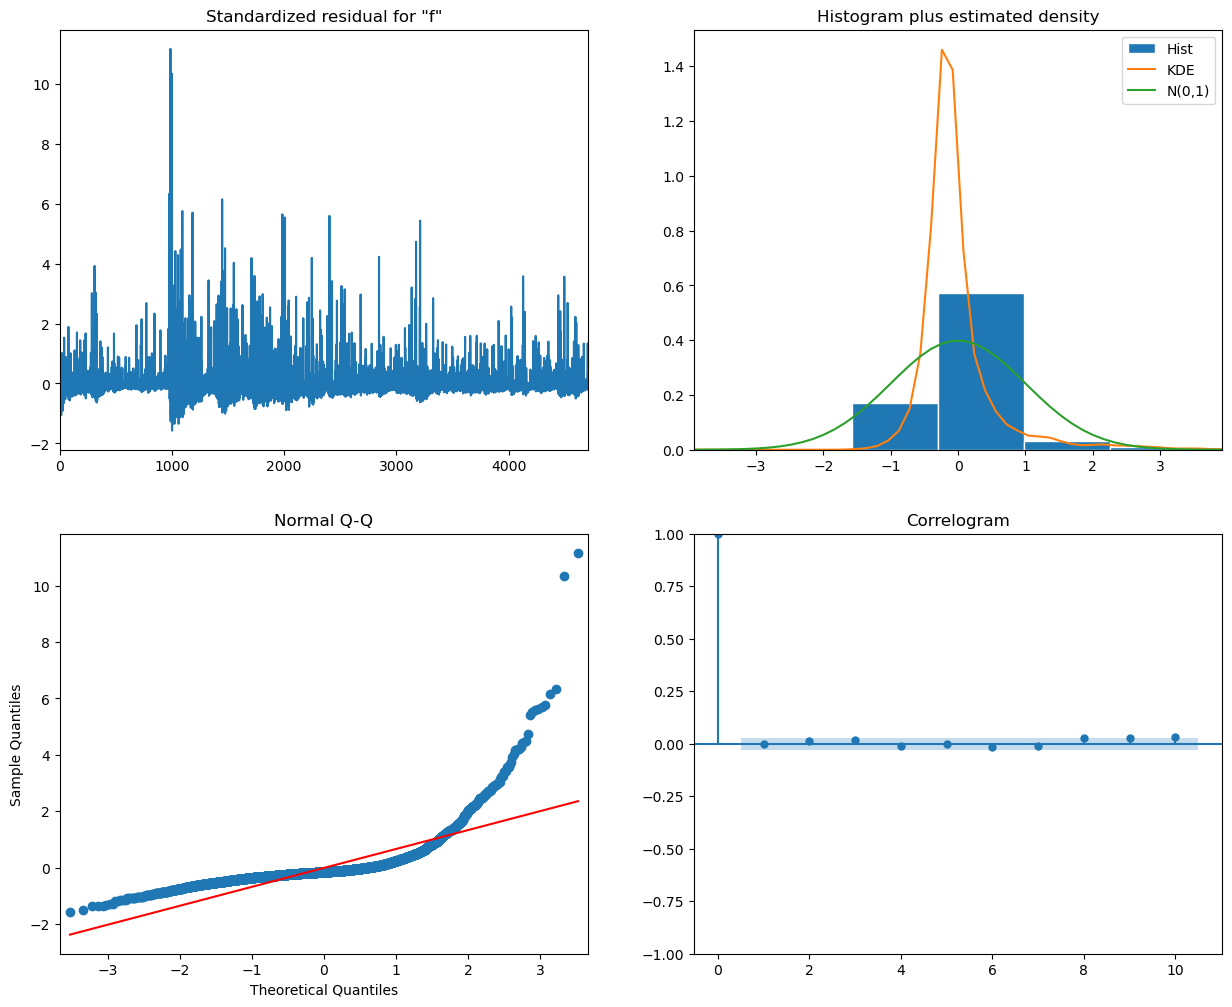

In [67]:
model.plot_diagnostics(figsize=(15, 12))

In [68]:
forecast_values = model.get_forecast(steps=(df.shape[0]-split))
forecast_ci = forecast_values.conf_int()

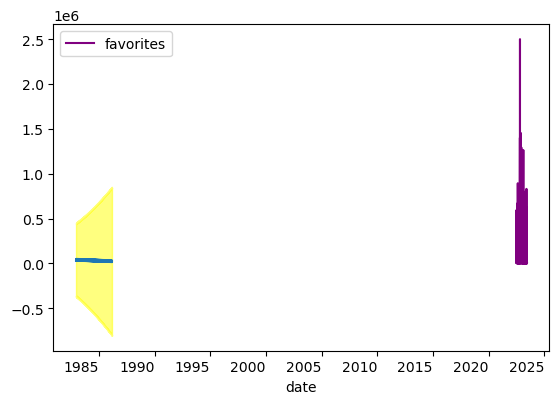

In [69]:
ax1 = df.plot(x="date", y="favorites", color="purple")

forecast_values.predicted_mean.plot(ax = ax1, label="Forecast")

ax1.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color="yellow",
    alpha=0.5
)

# Changing Model.Predict() to Model.Forecast()

In [70]:
pred_time = 20

results = model.forecast(pred_time)

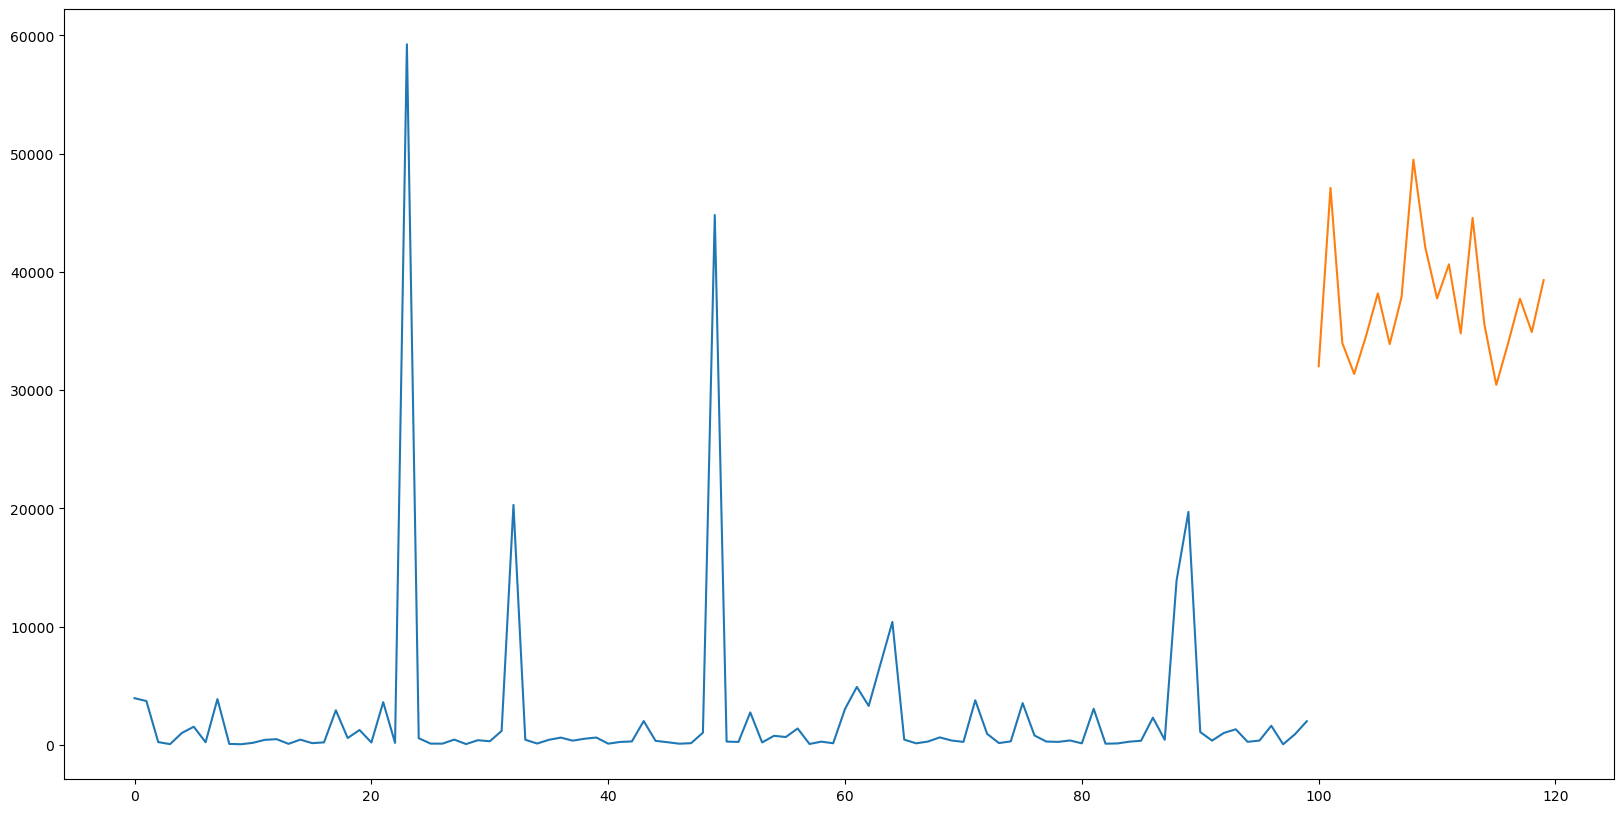

In [71]:
lagsDisplayed = 100

plt.figure(figsize=(20,10))
plt.plot(
    range(lagsDisplayed), 
    df["retweets"][-lagsDisplayed:]
)

plt.plot(
    range(lagsDisplayed, lagsDisplayed + pred_time), 
    results
);

In [72]:
model.predict(start=df["retweets"].shape[0]+10, end=df["retweets"].shape[0]+20)

5914    14071.146556
5915    18524.087711
5916    21288.726601
5917    18370.797892
5918    23496.407118
5919    33871.921143
5920    26059.693003
5921    21473.818975
5922    23863.069786
5923    18283.482733
5924    28358.927700
Name: predicted_mean, dtype: float64

pred_time = 20
model
result = model.predict(start=df["Closing"].shape[0]-10)


# Data Visualisation

In [77]:
df = pd.read_csv("elon_musk_tweets.csv")
df.head()

id  user_name user_location           user_description  \
0  1544379368478212100  Elon Musk           NaN  Mars & Cars, Chips & Dips   
1  1544377493263720450  Elon Musk           NaN  Mars & Cars, Chips & Dips   
2  1544377130590552064  Elon Musk           NaN  Mars & Cars, Chips & Dips   
3  1544375575724400645  Elon Musk           NaN  Mars & Cars, Chips & Dips   
4  1544375148605853699  Elon Musk           NaN  Mars & Cars, Chips & Dips   

                user_created  user_followers  user_friends  user_favourites  \
0  2009-06-02 20:12:29+00:00       101240855           115            13503   
1  2009-06-02 20:12:29+00:00       101240806           115            13503   
2  2009-06-02 20:12:29+00:00       101240806           115            13503   
3  2009-06-02 20:12:29+00:00       101240806           115            13503   
4  2009-06-02 20:12:29+00:00       101240806           115            13503   

   user_verified                       date  \
0           True  2022-07-05 17:55:09+00:00   
1           True  2022-07-05 17:47:42+00:00   
2           True  2022-07-05 17:46:15+00:00   
3           True  2022-07-05 17:40:05+00:00   
4           True  2022-07-05 17:38:23+00:00   

                                                text hashtags  \
0  @BillyM2k I find the gold toe sock – inevitabl...      NaN   
1                 Sock Con, the conference for socks      NaN   
2  Always something new for the magazine cover an...      NaN   
3                   @ExplainThisBob This guy gets it      NaN   
4  Sock tech is so advanced that you can get pret...      NaN   

               source  retweets  favorites  is_retweet  
0  Twitter for iPhone       335       6542       False  
1  Twitter for iPhone      1451      30753       False  
2  Twitter for iPhone      1284      28610       False  
3  Twitter for iPhone       131       3640       False  
4  Twitter for iPhone      1191      23790       False

In [78]:
df.describe()

id  user_followers  user_friends  user_favourites  \
count  5.904000e+03    5.904000e+03   5904.000000      5904.000000   
mean   1.618062e+18    1.265069e+08    192.918699     18717.950373   
std    3.259834e+16    1.186204e+07     67.569833      3673.085377   
min    1.544317e+18    1.012408e+08    115.000000     13503.000000   
25%    1.594339e+18    1.193263e+08    131.000000     15388.000000   
50%    1.619904e+18    1.283752e+08    178.000000     17883.000000   
75%    1.646781e+18    1.362687e+08    240.000000     21798.000000   
max    1.668435e+18    1.433260e+08    330.000000     25655.000000   

            retweets     favorites  
count    5904.000000  5.904000e+03  
mean     5504.126524  6.385289e+04  
std     14457.004070  1.326794e+05  
min         0.000000  5.200000e+01  
25%       350.750000  5.946500e+03  
50%      1092.000000  1.821300e+04  
75%      4213.250000  5.921225e+04  
max    359672.000000  2.500167e+06

In [79]:
#select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

user_name user_location           user_description  \
0  Elon Musk           NaN  Mars & Cars, Chips & Dips   
1  Elon Musk           NaN  Mars & Cars, Chips & Dips   
2  Elon Musk           NaN  Mars & Cars, Chips & Dips   
3  Elon Musk           NaN  Mars & Cars, Chips & Dips   
4  Elon Musk           NaN  Mars & Cars, Chips & Dips   

                user_created                       date  \
0  2009-06-02 20:12:29+00:00  2022-07-05 17:55:09+00:00   
1  2009-06-02 20:12:29+00:00  2022-07-05 17:47:42+00:00   
2  2009-06-02 20:12:29+00:00  2022-07-05 17:46:15+00:00   
3  2009-06-02 20:12:29+00:00  2022-07-05 17:40:05+00:00   
4  2009-06-02 20:12:29+00:00  2022-07-05 17:38:23+00:00   

                                                text hashtags  \
0  @BillyM2k I find the gold toe sock – inevitabl...      NaN   
1                 Sock Con, the conference for socks      NaN   
2  Always something new for the magazine cover an...      NaN   
3                   @ExplainThisBob This guy gets it      NaN   
4  Sock tech is so advanced that you can get pret...      NaN   

               source  
0  Twitter for iPhone  
1  Twitter for iPhone  
2  Twitter for iPhone  
3  Twitter for iPhone  
4  Twitter for iPhone

In [80]:
# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

user_name  user_location  user_description  user_created  date  text  \
0          0              6                 1             0     8   269   
1          0              6                 1             0     7  5417   
2          0              6                 1             0     6  4817   
3          0              6                 1             0     5   809   
4          0              6                 1             0     4  5418   

   hashtags  source  
0         2       1  
1         2       1  
2         2       1  
3         2       1  
4         2       1

In [81]:
# Convert object columns to category data type
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Convert int64 columns to float64
for col in df.select_dtypes(include=['int64']).columns:
    df[col] = df[col].astype('float64')
    
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes.astype('float64')    
    
print(df.dtypes)

id                  float64
user_name           float64
user_location       float64
user_description    float64
user_created        float64
user_followers      float64
user_friends        float64
user_favourites     float64
user_verified          bool
date                float64
text                float64
hashtags            float64
source              float64
retweets            float64
favorites           float64
is_retweet             bool
dtype: object


In [82]:
X = df.drop('favorites', axis=1)
y = df.favorites

In [83]:
lr = linear_model.LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)
r2 = r2_score(y, y_pred)
r2

0.8124052719658219

In [84]:
def get_regression_line(df):
    lr = linear_model.LinearRegression()
    lr.fit(X, y)
    coef = lr.coef_
    intercept = lr.intercept_

    scatter_plot = alt.Chart(df).mark_circle().encode(
        x='date',
        y='favorites',
        tooltip=['date', 'favorites'])

    line_plot = alt.Chart(pd.DataFrame({'date': [df['date'].min(), df['date'].max()],
                                         'favorites': [df['date'].min() * coef[0] + intercept,
                                                     df['date'].max() * coef[0] + intercept]})).mark_line(
        color='red').encode(
        x='date', y='favorites')

    return scatter_plot + line_plot

# Enable VegaFusion data transformer
alt.data_transformers.enable("vegafusion")


DataTransformerRegistry.enable('vegafusion')

In [85]:
get_regression_line(df)

alt.LayerChart(...)

Horizontal regression line suggest model is not capturing any significant relationship between favorites vs date

In [86]:
#Box Plot
def create_box_plot(df):
    df_long = df.melt(id_vars='date', var_name='key', value_name='value')
    df_long['date'] = df_long['date'].astype(float)
    df_long['value'] = df_long['value'].astype(float)
    
    return alt.Chart(df_long).mark_boxplot().encode(
        x=alt.X('key:N', title='Feature'),
        y=alt.Y('value:Q', title='Value'),
    ).interactive()

create_box_plot(df)


alt.Chart(...)

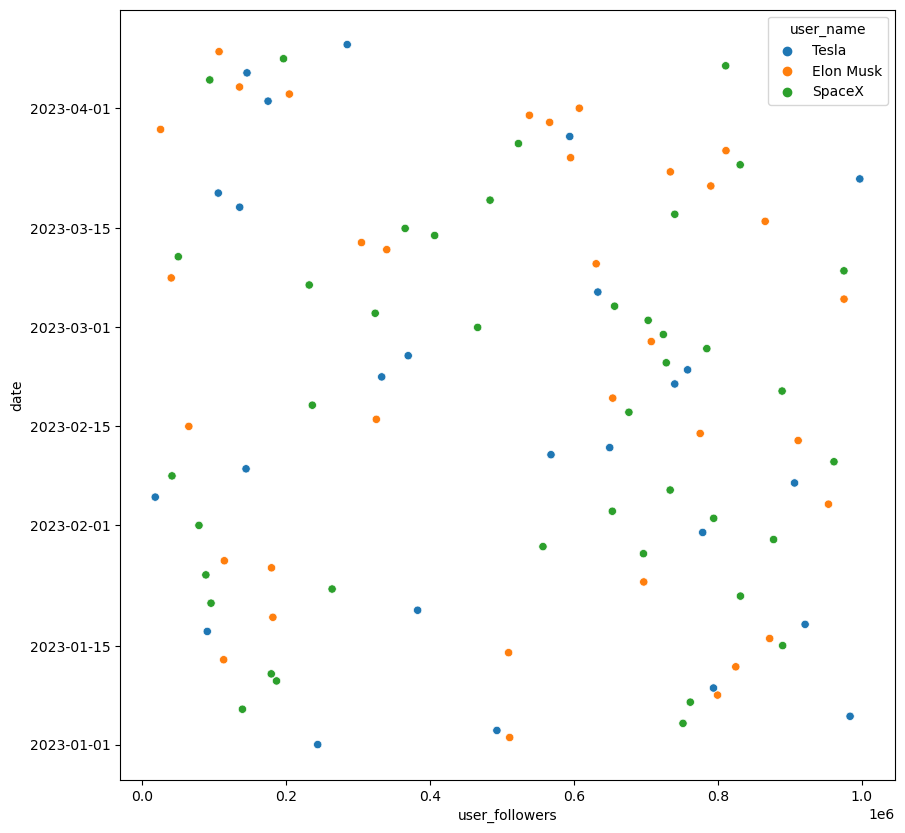

In [87]:
# Scatter plot
elon_musk_tweets = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'user_followers': np.random.randint(0, 1000000, 100),
    'user_name': np.random.choice(['Elon Musk', 'Tesla', 'SpaceX'], 100),
})

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax = sns.scatterplot(x='user_followers', y='date', hue='user_name', data=elon_musk_tweets)
plt.show()


In [88]:
#nan values to numerical
df['favorites'] = pd.to_numeric(df['favorites'], errors='coerce')
df['retweets'] = pd.to_numeric(df['retweets'], errors='coerce')

# Drop rows with null values in 'favorites' or 'retweets'
df = df.dropna(subset=['favorites', 'retweets'])

scatter_plot = alt.Chart(df).mark_circle().encode(
    x='favorites:Q',
    y='retweets:Q',
    color='date:T',
    tooltip=['date:T', 'favorites:Q', 'retweets:Q']
).interactive()

scatter_plot


alt.Chart(...)

In [89]:

scatter_chart = alt.Chart(df).mark_circle().encode(
    x='favorites:Q',
    y='retweets:Q',
    color='user_description:N',
    tooltip=['id','user_name','user_location','user_description','user_created','user_followers','user_friends','user_favourites','user_verified','date','text','hashtags','source','retweets','favorites','is_retweet']
).interactive()

scatter_chart



alt.Chart(...)

# Dash Board

In [90]:

elon_musk_tweets = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'favorites': np.random.randint(0, 100, 10),
    'retweets': np.random.randint(0, 50, 10),
    'user_name': ['Elon Musk'] * 10,  
})

def update_plot(event):
    selected_user = user_dropdown.value
   
    print(f"Updating plot for user: {selected_user}")

# Convert the 'user_name' column to a list for the options parameter
user_options = elon_musk_tweets['user_name'].unique().tolist()

# Create a dropdown widget
user_dropdown = pn.widgets.Select(options=user_options, name='Select User')

# Heatmap
heatmap_data = pd.DataFrame({
    'x': elon_musk_tweets['date'],
    'y': elon_musk_tweets['favorites'],
    'color': elon_musk_tweets['retweets'],  
})

heatmap_pivoted = heatmap_data.pivot_table(index='y', columns='x', values='color', aggfunc='mean')
heatmap = px.imshow(heatmap_pivoted, title='Heatmap', color_continuous_scale='Viridis')
heatmap.update_layout(plot_bgcolor='#F2DFCE', paper_bgcolor='#F2DFCE') 


# Scatter plot
scatterplot_data = pd.DataFrame({
    'x': elon_musk_tweets['date'],
    'y': elon_musk_tweets['favorites'],
})

scatterplot = px.scatter(scatterplot_data, x='x', y='y', title='Scatter Plot')
scatterplot.update_layout(plot_bgcolor='#F2DFCE', paper_bgcolor='#F2DFCE') 

# Box plot
boxplot_data = pd.DataFrame({
    'x': elon_musk_tweets['date'],
    'y': elon_musk_tweets['favorites'],
})

boxplot = px.box(boxplot_data, x='x', y='y', title='Box Plot')
boxplot.update_layout(plot_bgcolor='#F2DFCE', paper_bgcolor='#F2DFCE') 

# Bar graph
bar_data = pd.DataFrame({
    'x': elon_musk_tweets['date'],
    'y': elon_musk_tweets['retweets'],
})

bar_graph = px.bar(bar_data, x='x', y='y', title='Bar Graph')
bar_graph.update_layout(plot_bgcolor='#F2DFCE', paper_bgcolor='#F2DFCE')  


# Define the layout of your dashboard
dashboard = pn.Column(
    pn.pane.Markdown('# Elon Musk Tweets Dashboard'),
    user_dropdown,
    heatmap,
   pn.pane.Plotly(scatterplot), 
    pn.pane.Plotly(boxplot),
    pn.pane.Plotly(bar_graph),
)


user_dropdown.param.watch(update_plot, 'value')


dashboard.show()




Launching server at http://localhost:55266


# References

In [ ]:
1. https://www.cct.ie/wp-content/themes/hdcct/img/atoms/logo.jpg
2. https://www.kaggle.com/code/vencerlanz09/elon-musk-tweets-eda-and-sentiment-analysis/notebook#%E2%9C%92%EF%B8%8FInitialization  
3. Ringki Das and Thoudam Doren Singh. 2023. Multimodal Sentiment Analysis: A Survey of Methods, Trends, and Challenges. ACM Comput. Surv. 55, 13s, Article 270 (July 2023), 38 pages. https://doi.org/10.1145/3586075 Accessed: 21 November 2023
4. Suresh Kumar Mukhiya & Usman Ahmed, 2020.Hands-On Exploratory Data Analysis with Python : Exploratory Data Analysis Fundamentals. Birmingham, UK: Packt Publishing, 2020. ISBN 9781789537253. Disponível em: https://search.ebscohost.com/login.aspx?direct=true&db=e250xww&AN=2411474&site=eds-live&scope=site. Page 8, Acesso em: 21 November 2023.
5. Avinash Navlani, Armando Fandango, and Ivan Idris. 2021. Python Data Analysis : Perform Data Collection, Data Processing, Wrangling, Visualization, and Model Building Using Python. Vol. Third edition. Birmingham: Packt Publishing. https://search.ebscohost.com/login.aspx?direct=true&db=e250xww&AN=2725992&site=eds-live&scope=site. Accessed: 23 November 2023, page 237, Acessed: 23 November 2023
                  
